# How process files in a folder

In this notebook we will program a loop which walks over a folder of images. Furthermore, the loop will call a python function that analyses the images one by one. Hence, we will process all images in that folder using the same procedure.

See also
* [Working with files in python](https://realpython.com/working-with-files-in-python/)
* [Iterate over files in a directory](https://newbedev.com/how-to-iterate-over-files-in-a-given-directory)

In [1]:
import os
from skimage.io import imread
from matplotlib.pyplot import imshow, show
from skimage.io import imread
import numpy as np

For demonstration purposes, we reuse a folder of images showing banana-slices imaged using magnetic resonance imaging (Courtesy of Nasreddin Abolmaali, OncoRay, TU Dresden)

In [2]:
# define the location of the folder to go through
directory = '../../data/banana/'

# get a list of files in that folder
file_list = os.listdir(directory)

file_list

['banana0002.tif',
 'banana0003.tif',
 'banana0004.tif',
 'banana0005.tif',
 'banana0006.tif',
 'banana0007.tif',
 'banana0008.tif',
 'banana0009.tif',
 'banana0010.tif',
 'banana0011.tif',
 'banana0012.tif',
 'banana0013.tif',
 'banana0014.tif',
 'banana0015.tif',
 'banana0016.tif',
 'banana0017.tif',
 'banana0018.tif',
 'banana0019.tif',
 'banana0020.tif',
 'banana0021.tif',
 'banana0022.tif',
 'banana0023.tif',
 'banana0024.tif',
 'banana0025.tif',
 'banana0026.tif',
 'image_source.txt']

Obviously, there are not just images in that folder. We can filter that list with a short for-statement:

In [3]:
image_file_list = [file for file in file_list if file.endswith(".tif")]

image_file_list

['banana0002.tif',
 'banana0003.tif',
 'banana0004.tif',
 'banana0005.tif',
 'banana0006.tif',
 'banana0007.tif',
 'banana0008.tif',
 'banana0009.tif',
 'banana0010.tif',
 'banana0011.tif',
 'banana0012.tif',
 'banana0013.tif',
 'banana0014.tif',
 'banana0015.tif',
 'banana0016.tif',
 'banana0017.tif',
 'banana0018.tif',
 'banana0019.tif',
 'banana0020.tif',
 'banana0021.tif',
 'banana0022.tif',
 'banana0023.tif',
 'banana0024.tif',
 'banana0025.tif',
 'banana0026.tif']

Alternatively, we can also write a longer for-loop and check if files are images. This code does exactly the same, it is just written in a different way.

In [4]:
# go through all files in the folder
for file in file_list:
    # if the filename is of a tif-image, print it out
    if file.endswith(".tif"):
        print(file)

banana0002.tif
banana0003.tif
banana0004.tif
banana0005.tif
banana0006.tif
banana0007.tif
banana0008.tif
banana0009.tif
banana0010.tif
banana0011.tif
banana0012.tif
banana0013.tif
banana0014.tif
banana0015.tif
banana0016.tif
banana0017.tif
banana0018.tif
banana0019.tif
banana0020.tif
banana0021.tif
banana0022.tif
banana0023.tif
banana0024.tif
banana0025.tif
banana0026.tif


As you can see above `image_file_list` is a list of strings. Storing the name of the image in a list means way less computational power than storing the images themselves in the list. It makes sense to `imread` the images at the latest possible point in time, here in the for-loop below. If you are interested in folder structures and specifying these directories, you can check out these two jupyter notebooks [here](https://github.com/BiAPoL/Quantitative_Bio_Image_Analysis_with_Python_2022/blob/main/docs/day1x_Folder_Structures/05_Folder_structures.ipynb) and [here](https://github.com/BiAPoL/Quantitative_Bio_Image_Analysis_with_Python_2022/blob/main/docs/day1x_Folder_Structures/06_Folder_structures2.ipynb).

In order to show all images, we need to open them from the correct `directory`:

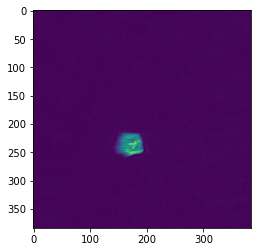

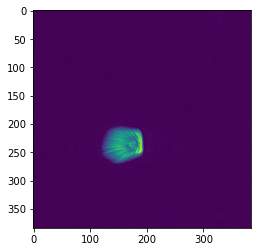

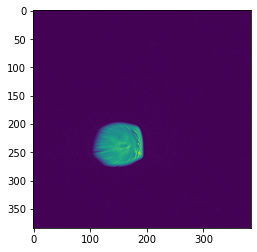

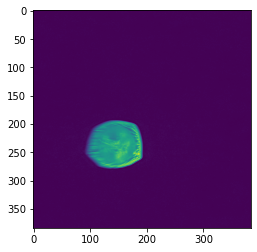

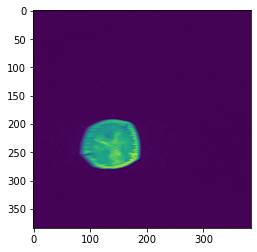

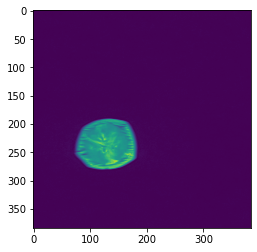

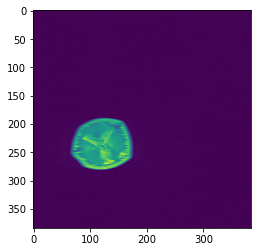

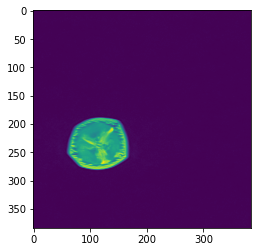

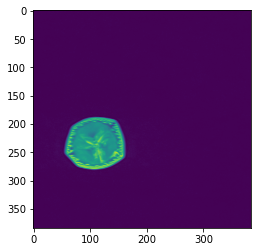

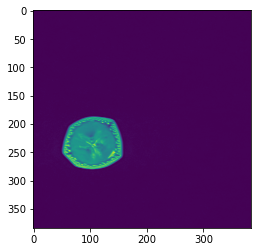

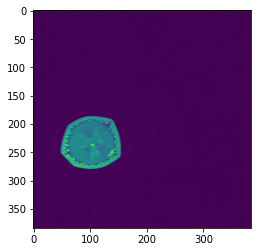

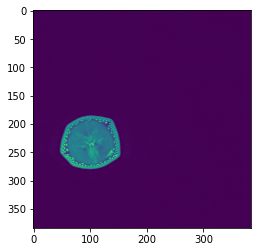

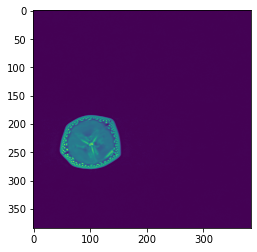

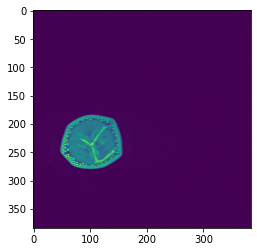

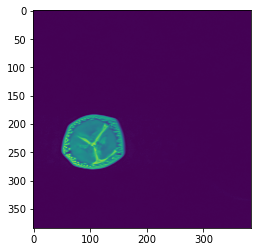

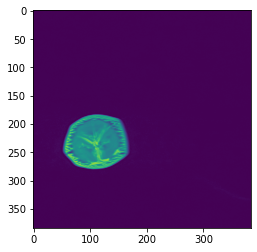

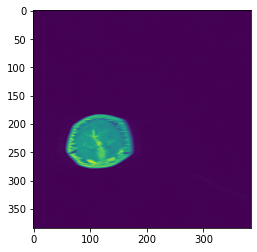

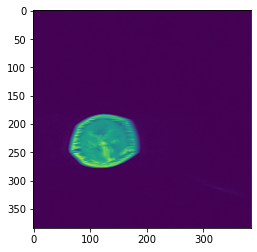

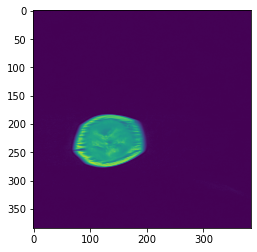

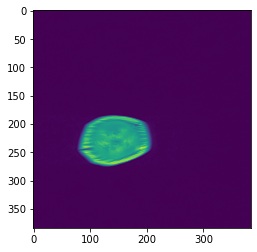

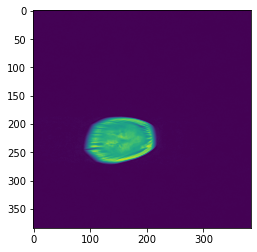

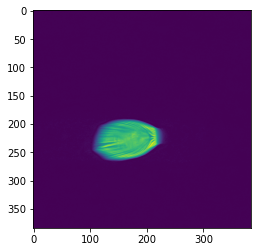

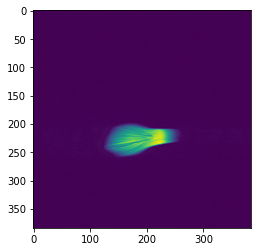

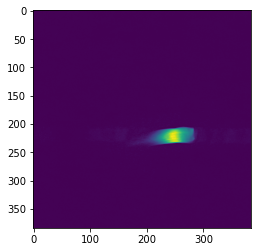

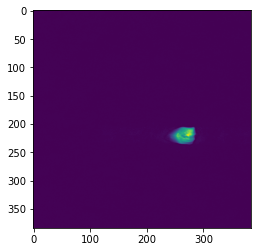

In [5]:
# go through all files in the folder
for image_file in image_file_list:
    image = imread(directory + image_file)
    imshow(image)
    show()

[Custom functions](https://nbviewer.jupyter.org/github/BiAPoL/Bio-image_Analysis_with_Python/blob/main/python_basics/09_custom_functions.ipynb) help us to keep code organized. For example, we can put image-analysis code in a function and then just call it:

In [6]:
def load_and_measure(filename):
    """
    This function opens an image and returns its mean intensity.
    """
    image = imread(filename)
    
    # return mean intensity in the image
    return np.mean(image)

# for testing
load_and_measure(directory + "banana0010.tif")

69.15106201171875

With such a custom function, we can also make use of the short form for writing for-loops:

In [7]:
mean_intensities_of_all_images = [load_and_measure(directory + file) for file in image_file_list]
mean_intensities_of_all_images

[12.94198947482639,
 25.04678683810764,
 39.627543131510414,
 49.71319580078125,
 56.322109646267364,
 60.08679877387153,
 63.94538031684028,
 66.04618326822917,
 69.15106201171875,
 70.85603162977431,
 74.40909152560764,
 77.48423936631944,
 81.77360026041667,
 85.44072129991319,
 91.22532823350694,
 94.36199951171875,
 98.47229682074652,
 99.3980712890625,
 102.34300401475694,
 101.50947401258681,
 97.14067247178819,
 80.13118489583333,
 49.77497694227431,
 28.36090766059028,
 18.806070963541668]

# Exercise
Open all images of the banana dataset, segment the images and measure the centroid of the banana slices to a table. Write measurement results to "banana.csv".

Hint: Instead of the `imshow` command in the last example, execute your image processing workflow. Setup the image processing workflow first, e.g. in a custom function. Programm iterating over files in a folder last, after the image processing works.